<a href="https://colab.research.google.com/github/lilchengzi/BA820-project/blob/main/New_way_for_BA820_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries and loading the dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset")

Skipping, found downloaded files in "./instacart-online-grocery-basket-analysis-dataset" (use force=True to force download)


In [3]:

import pandas as pd
import numpy as np

In [4]:
# loading all dataframes

aisles = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/aisles.csv')
dept = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/departments.csv')
orders_prior = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/order_products__prior.csv')
orders = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/orders.csv')
prod = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/products.csv')

In [ ]:
#aisles = pd.read_csv('/content/aisles.csv')
#dept = pd.read_csv('/content/departments.csv')
#orders_prior = pd.read_csv('/content/order_products__prior.csv')
#orders = pd.read_csv('/content/orders.csv')
#prod = pd.read_csv('/content/products.csv')

In [5]:
orders_prior = orders_prior.sample(frac=0.01, random_state=42)

In [8]:
orders_prior

,order_id,product_id,add_to_cart_order,reordered
29481110,3109255,34099,16,0
2852353,301098,41950,5,0
11194500,1181866,45066,8,0
15909397,1678630,8859,2,1
6101870,644090,24781,2,0
...,...,...,...,...
13579781,1433375,34969,5,1
22168330,2338221,10248,10,0
4041427,426460,27676,7,0
4328233,456879,38028,2,1


In [9]:
print(orders_prior)

          order_id  product_id  add_to_cart_order  reordered
29481110   3109255       34099                 16          0
2852353     301098       41950                  5          0
11194500   1181866       45066                  8          0
15909397   1678630        8859                  2          1
6101870     644090       24781                  2          0
...            ...         ...                ...        ...
13579781   1433375       34969                  5          1
22168330   2338221       10248                 10          0
4041427     426460       27676                  7          0
4328233     456879       38028                  2          1
31706271   3344107       40706                  4          1

[324345 rows x 4 columns]


In [6]:
# joining them together on common keys

df1 = pd.merge(prod, aisles, how='inner', on='aisle_id')
df2 = df1.merge(dept, how='inner', on='department_id')
df3 = df2.merge(orders_prior, how='inner', on='product_id')
df4 = df3.merge(orders, how='inner', on='order_id')

#simplifying pnenomics and displaying the dataframe
df = df4.copy()
df.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,prior,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,prior,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,prior,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,prior,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,prior,15,3,16,15.0


##Exploring the dataset

In [7]:
df.eval_set.unique()

array(['prior'], dtype=object)

In [8]:
df = df.drop('eval_set', axis=1)

Dropping the eval_set column since it holds no relevance and is merely a label for orders with only one label present.

In [9]:
df.isna().sum()

product_id                    0
product_name                  0
aisle_id                      0
department_id                 0
aisle                         0
department                    0
order_id                      0
add_to_cart_order             0
reordered                     0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20775
dtype: int64

The data contains no null values for any of the columns so we need not drop any rows.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324345 entries, 0 to 324344
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              324345 non-null  int64  
 1   product_name            324345 non-null  object 
 2   aisle_id                324345 non-null  int64  
 3   department_id           324345 non-null  int64  
 4   aisle                   324345 non-null  object 
 5   department              324345 non-null  object 
 6   order_id                324345 non-null  int64  
 7   add_to_cart_order       324345 non-null  int64  
 8   reordered               324345 non-null  int64  
 9   user_id                 324345 non-null  int64  
 10  order_number            324345 non-null  int64  
 11  order_dow               324345 non-null  int64  
 12  order_hour_of_day       324345 non-null  int64  
 13  days_since_prior_order  303570 non-null  float64
dtypes: float64(1), int64

The data types seem relevant to their respective columns.

In [15]:
df.describe()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,324345.000000,324345.000000,324345.000000,3.243450e+05,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,303570.000000
mean,25551.139194,71.198033,9.938035,1.710520e+06,8.376010,0.589536,102951.981295,17.144796,2.733216,13.428571,11.093603
std,14110.454313,38.222234,6.276621,9.869484e+05,7.158359,0.491919,59441.408028,17.502843,2.090947,4.251041,8.769043
min,1.000000,1.000000,1.000000,4.300000e+01,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,13431.000000,31.000000,4.000000,8.559500e+05,3.000000,0.000000,51566.000000,5.000000,1.000000,10.000000,5.000000
50%,25167.000000,83.000000,9.000000,1.709853e+06,6.000000,1.000000,102527.000000,11.000000,3.000000,13.000000,8.000000
75%,37892.000000,107.000000,16.000000,2.561704e+06,11.000000,1.000000,154508.000000,24.000000,5.000000,16.000000,15.000000
max,49688.000000,134.000000,21.000000,3.421081e+06,110.000000,1.000000,206208.000000,99.000000,6.000000,23.000000,30.000000


In [16]:
df.describe(include='object')

,product_name,aisle,department
count,324345,324345,324345
unique,25415,134,21
top,Banana,fresh fruits,produce
freq,4754,36393,94761


Having a look at the summary statistics gives us a clearer picture of the dataset to perform further analysis.

##EDA

In [17]:
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,3,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,14,5,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,30,3,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,2,4,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,4,4,10,2.0


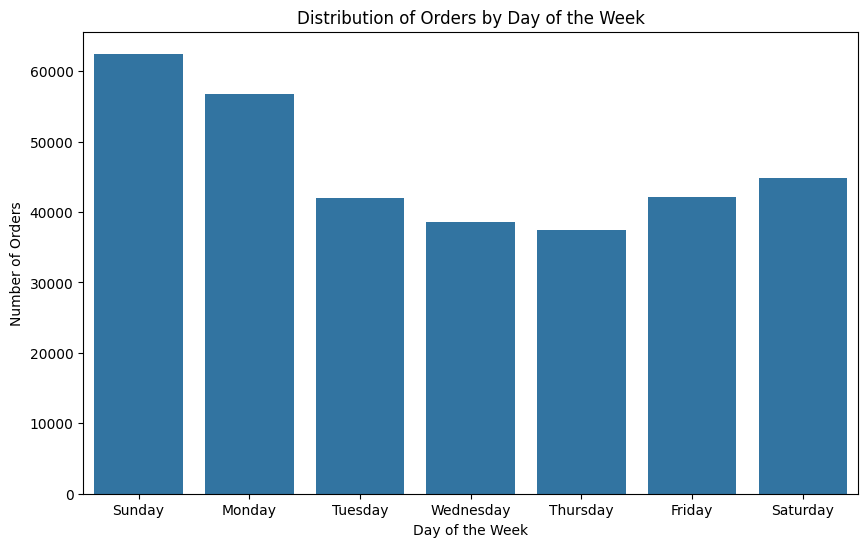

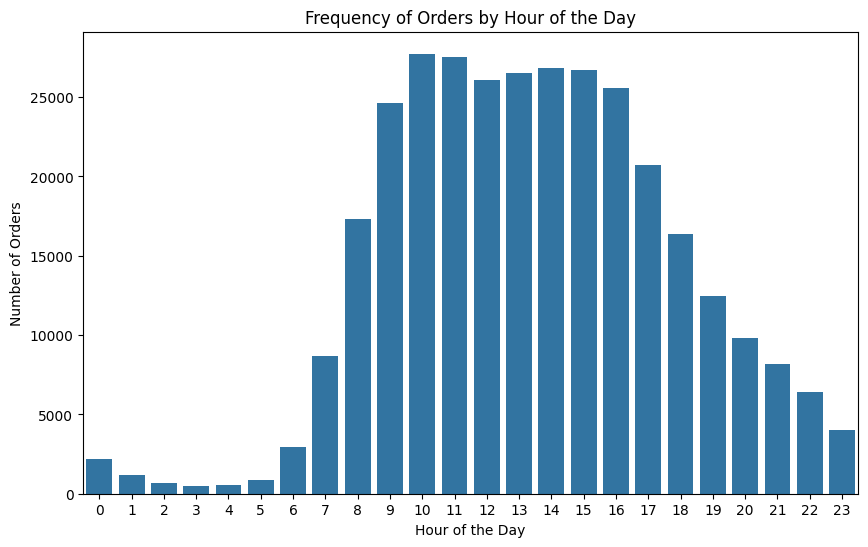

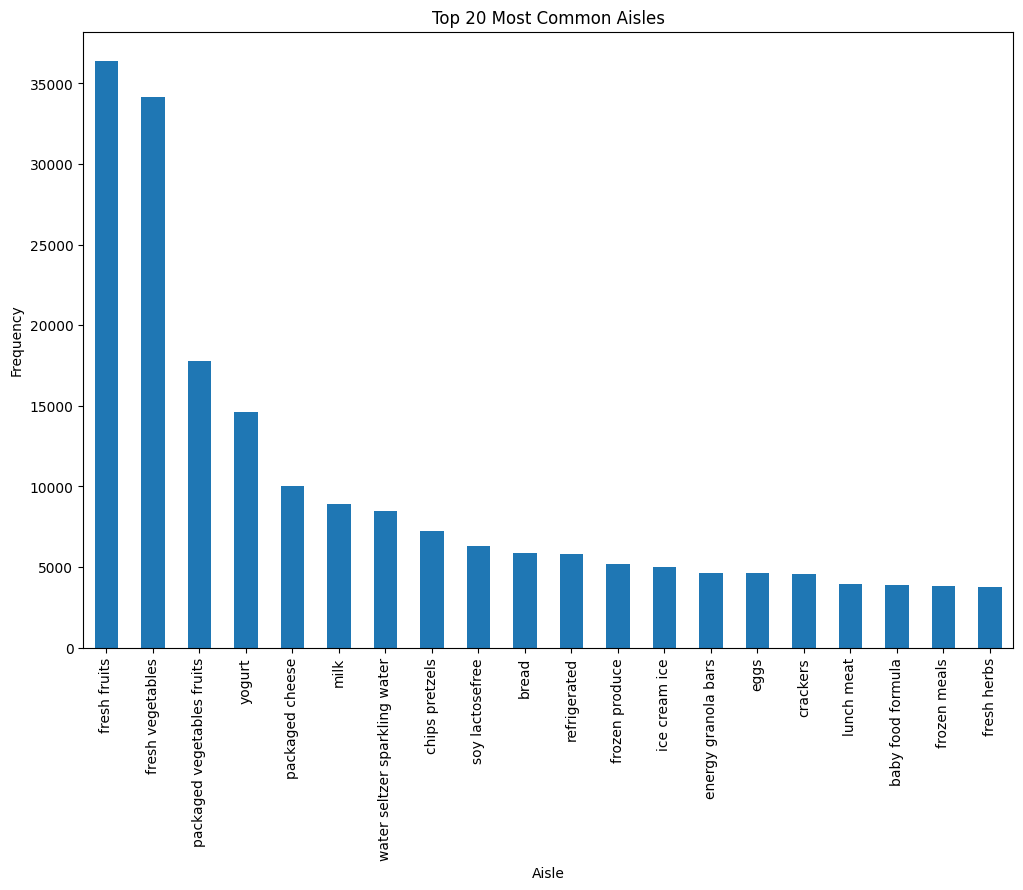

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization 1: Distribution of orders by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='order_dow')
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(0, 7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

#Visualization 2: Frequency of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='order_hour_of_day')
plt.title('Frequency of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

#Visualization 3: Top 20 most common aisles
top_aisles = df4['aisle'].value_counts().head(20)
plt.figure(figsize=(12, 8))
top_aisles.plot(kind='bar')
plt.title('Top 20 Most Common Aisles')
plt.xlabel('Aisle')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


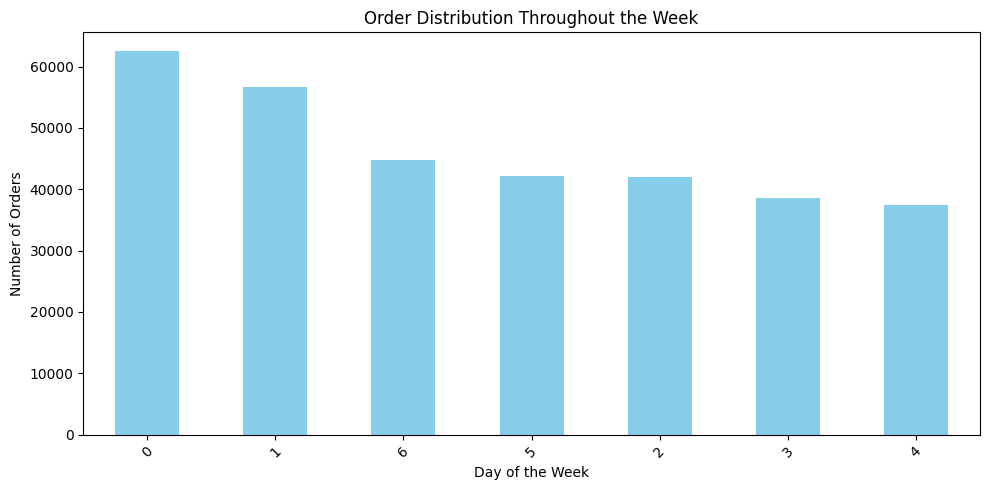

In [19]:
order_counts = df['order_dow'].value_counts()
#Plot distribution of orders throughout the week
plt.figure(figsize=(10, 5))
order_counts.plot(kind='bar', color='skyblue')
plt.title('Order Distribution Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

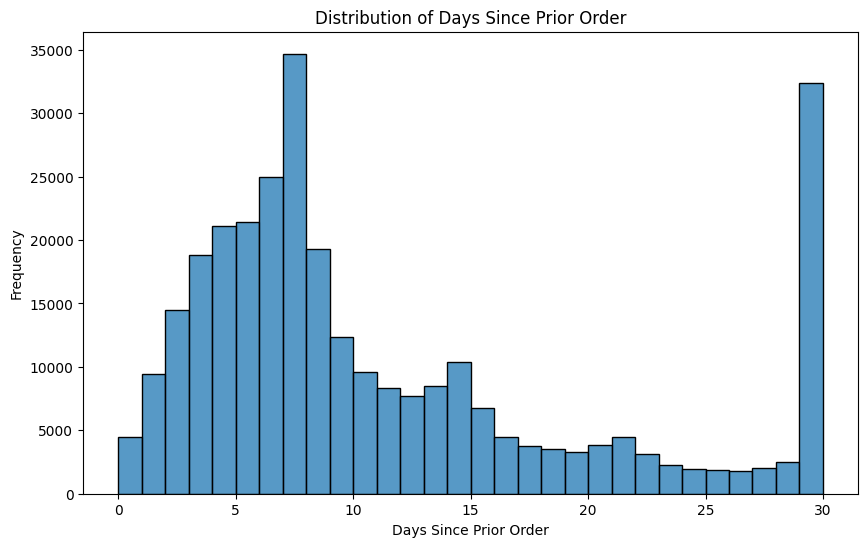

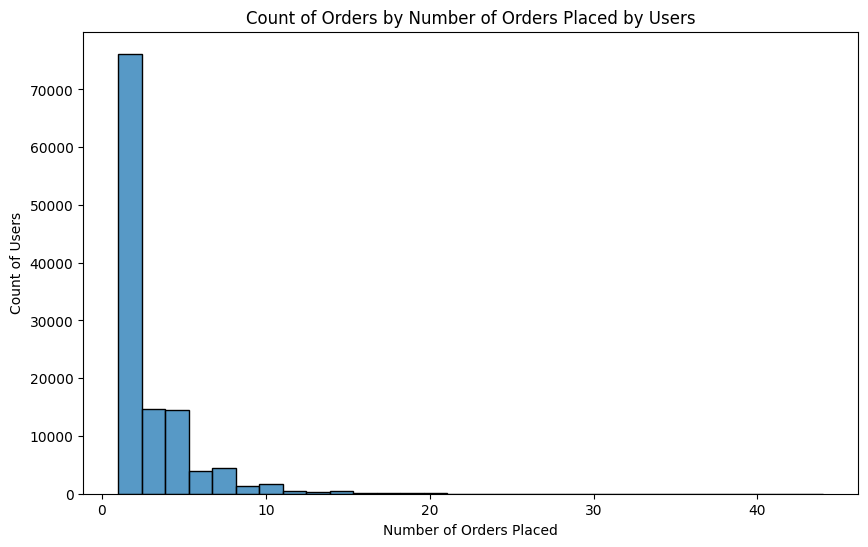

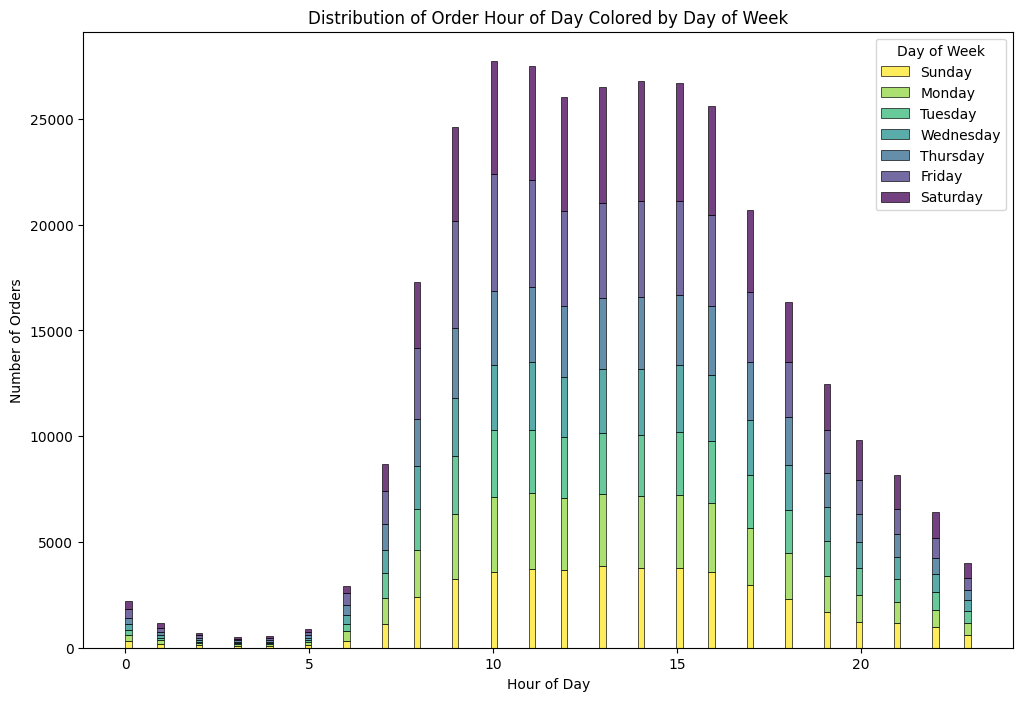

<ipython-input-20-30796f58235e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='order_dow', y='order_hour_of_day', palette='coolwarm')


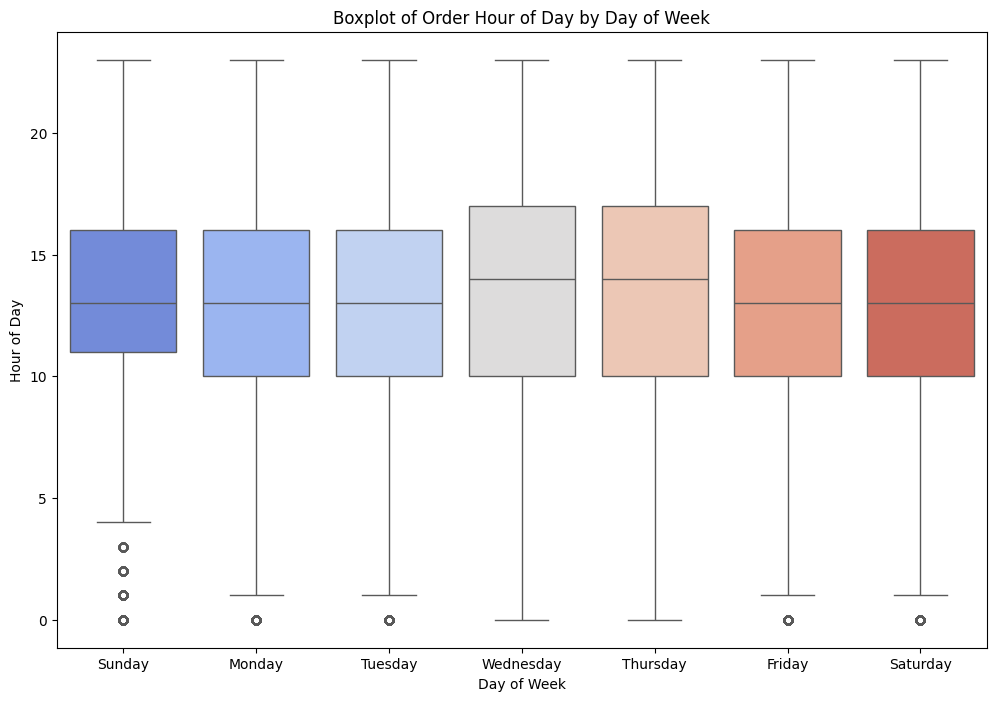

In [20]:
#Visualization 4: Distribution of days since prior order
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='days_since_prior_order', bins=30, kde=False)
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.show()

#Visualization 5: Count of orders by the number of orders placed by users
order_counts = df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(order_counts, bins=30, kde=False)
plt.title('Count of Orders by Number of Orders Placed by Users')
plt.xlabel('Number of Orders Placed')
plt.ylabel('Count of Users')
plt.show()

#Visualization 6: Distribution of order_hour_of_day colored by order_dow
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='order_hour_of_day', hue='order_dow', multiple='stack', palette='viridis')
plt.title('Distribution of Order Hour of Day Colored by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Day of Week', labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

#Visualization 7: Boxplot of order_hour_of_day by order_dow
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='order_dow', y='order_hour_of_day', palette='coolwarm')
plt.title('Boxplot of Order Hour of Day by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=range(0, 7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()


# Kmeans

In [10]:
df.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,3,16,15.0


In [12]:
from sklearn.preprocessing import StandardScaler
nm_data = df.select_dtypes(exclude=['object'])
sc = StandardScaler()
data_nm = sc.fit_transform(nm_data)
df_nm = pd.DataFrame(data_nm, columns=nm_data.columns)
df_nm

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,-1.810727,-0.266809,1.443767,-0.796022,0.366564,0.834416,1.252648,3.134079,1.084096,-2.923658,-0.808938
1,-1.810727,-0.266809,1.443767,-1.461085,0.645958,0.834416,0.924660,0.163128,-0.828916,-1.041763,1.015665
2,-1.810727,-0.266809,1.443767,0.404423,-0.611316,-1.198443,0.715866,-0.808144,-0.350663,0.134421,-1.151051
3,-1.810727,-0.266809,1.443767,1.519049,-0.890710,0.834416,-1.597727,0.391663,-0.350663,-0.100816,-0.580863
4,-1.810727,-0.266809,1.443767,-0.162466,-1.030407,0.834416,-0.605370,-0.122540,0.127590,0.604895,0.445477
...,...,...,...,...,...,...,...,...,...,...,...
324340,0.341156,-1.391811,0.009872,0.247318,-0.192225,-1.198443,0.465148,-0.179674,1.084096,-0.100816,-0.238750
324341,0.341156,-1.391811,0.009872,0.621326,-1.030407,0.834416,-0.213942,0.734465,0.127590,-0.806526,-1.151051
324342,0.341156,-1.391811,0.009872,-0.843342,-0.192225,0.834416,0.462894,-0.865278,0.605843,0.840132,-0.694901
324343,1.646077,-1.391811,0.009872,1.051602,-1.030407,-1.198443,-0.101427,-0.751010,0.605843,-0.806526,-1.037014


In [14]:
df_nm = df_nm.drop(columns=['days_since_prior_order'])

In [12]:
nm_data

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,61,19,924888,11,1,177411,72,5,1,4.0
1,1,61,19,268506,13,1,157915,20,1,9,20.0
2,1,61,19,2109664,4,0,145504,3,2,14,1.0
3,1,61,19,3209740,2,1,7981,24,2,13,6.0
4,1,61,19,1550174,1,1,66968,15,3,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,18,10,1954609,7,0,130601,14,5,13,9.0
324341,30365,18,10,2323735,1,1,90235,30,3,10,1.0
324342,30365,18,10,878186,7,1,130467,2,4,17,5.0
324343,48778,18,10,2748395,1,0,96923,4,4,10,2.0


In [24]:
df_nm.describe()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.243450e+05,3.243450e+05,3.243450e+05,3.243450e+05,3.243450e+05,3.243450e+05,3.243450e+05,3.243450e+05,3.243450e+05,3.243450e+05,3.035700e+05
mean,-5.888603e-17,3.645326e-17,8.412290e-17,3.993647e-17,1.382770e-16,5.678296e-17,-8.841667e-17,6.151487e-17,3.855633e-18,-6.453804e-17,2.434247e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.810727e+00,-1.836579e+00,-1.424022e+00,-1.733099e+00,-1.030407e+00,-1.198443e+00,-1.731960e+00,-9.224114e-01,-1.307169e+00,-3.158895e+00,-1.265089e+00
25%,-8.589488e-01,-1.051694e+00,-9.460575e-01,-8.658719e-01,-7.510127e-01,-1.198443e+00,-8.644826e-01,-6.938767e-01,-8.289157e-01,-8.065264e-01,-6.949005e-01
50%,-2.722377e-02,3.087728e-01,-1.494493e-01,-6.753802e-04,-3.319216e-01,8.344158e-01,-7.149594e-03,-3.510747e-01,1.275901e-01,-1.008158e-01,-3.527874e-01
75%,8.745912e-01,9.366805e-01,9.658022e-01,8.624420e-01,3.665636e-01,8.344158e-01,8.673432e-01,3.916629e-01,1.084096e+00,6.048948e-01,4.454766e-01
max,1.710568e+00,1.643077e+00,1.762410e+00,1.733185e+00,1.419657e+01,8.344158e-01,1.737109e+00,4.676688e+00,1.562349e+00,2.251553e+00,2.156042e+00


In [15]:
df_nm.isna().sum()

product_id           0
aisle_id             0
department_id        0
order_id             0
add_to_cart_order    0
reordered            0
user_id              0
order_number         0
order_dow            0
order_hour_of_day    0
dtype: int64

In [31]:
df_nm

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day
0,-1.810727,-0.266809,1.443767,-0.796022,0.366564,0.834416,1.252648,3.134079,1.084096,-2.923658
1,-1.810727,-0.266809,1.443767,-1.461085,0.645958,0.834416,0.924660,0.163128,-0.828916,-1.041763
2,-1.810727,-0.266809,1.443767,0.404423,-0.611316,-1.198443,0.715866,-0.808144,-0.350663,0.134421
3,-1.810727,-0.266809,1.443767,1.519049,-0.890710,0.834416,-1.597727,0.391663,-0.350663,-0.100816
4,-1.810727,-0.266809,1.443767,-0.162466,-1.030407,0.834416,-0.605370,-0.122540,0.127590,0.604895
...,...,...,...,...,...,...,...,...,...,...
324340,0.341156,-1.391811,0.009872,0.247318,-0.192225,-1.198443,0.465148,-0.179674,1.084096,-0.100816
324341,0.341156,-1.391811,0.009872,0.621326,-1.030407,0.834416,-0.213942,0.734465,0.127590,-0.806526
324342,0.341156,-1.391811,0.009872,-0.843342,-0.192225,0.834416,0.462894,-0.865278,0.605843,0.840132
324343,1.646077,-1.391811,0.009872,1.051602,-1.030407,-1.198443,-0.101427,-0.751010,0.605843,-0.806526


In [30]:
df_clean_nm = df_nm.drop(columns=['days_since_prior_order'], inplace=True)

KeyError: "['days_since_prior_order'] not found in axis"

In [28]:
df_clean_nm.isna().sum()

AttributeError: 'NoneType' object has no attribute 'isna'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

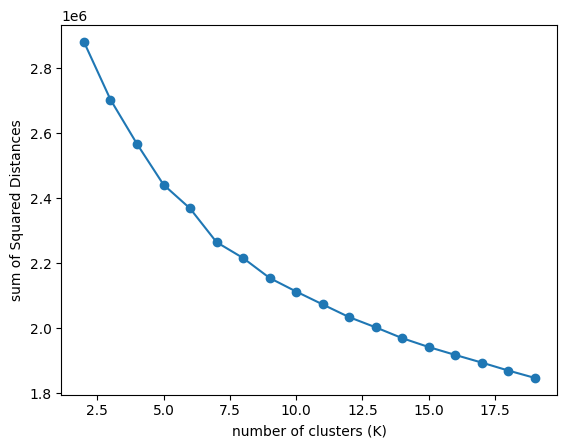

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = []
for k in range(2,20):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(df_nm)
  sse.append(kmeans.inertia_)

plt.plot(range(2,20), sse, marker='o')
plt.xlabel('number of clusters (K)')
plt.ylabel('sum of Squared Distances')
plt.show()


In [37]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(df_nm)
  silhouette_scores.append(silhouette_scores.index(max(silhouette_scores)))

optimal_k_sil = range(2,11)[silhouette_scores.index(max(silhouette_scores))]

plt.plot(range(2,11), silhouette_scores, marker='o')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: max() arg is an empty sequence

In [32]:
from sklearn.cluster import KMeans
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters)
df_nm.dropna()
kmeans.fit(df_nm)
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
num_clusters = 6

Z = linkage(df_nm, 'ward')
df_nm['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')


In [ ]:
from gap_statistic import OptimalK
optiimal_k_gap = OptimalK(parallel_backend='joblib')
optimal_k_gap,fit(df_nm)


In [ ]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(df.nm)
  davies_bouldin_scores.append(davies_bouldin_score(df_nm, labels))

optimal_k_davies_boudin= range(2,11)[davies_bouldin_scores.index(min(davies_bouldin_scores))]